<a href="https://colab.research.google.com/github/ruchit2005/ML_Tutorial/blob/main/Dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is End-to-End Multi-class dog breed classification project

We use TensorFlow 2.0 and TenorFlow hub

## 1.Problem

Identifying the dog breed through an image
When i am sitting in an cafe, i take a pic of the dog to know what breed it is of

## 2.Data

The data i am using is from Kaggle:
https://www.kaggle.com/competitions/dog-breed-identification/data?select=test

## 3.Features

THe evaluations is predictiong the probability of each dog breeds for each test image

## 4.Evaluation

We are dealing with images (unstructured data) so its best we use deep learning/transfer learning

### Getting our worksapce ready

* Importing tensrFlow
* Importing tensorFlow Hub
* Make sure we are using a GPU


## Importing TensorFlow


In [1]:
import tensorflow as tf
import tensorflow_hub as hub
print("TensorFlow version:",tf.__version__)
print("TensorFlow Hub version:",hub.__version__)

TensorFlow version: 2.18.0
TensorFlow Hub version: 0.16.1


In [3]:
!unzip "/content/drive/MyDrive/Dogs/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dogs"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Dogs/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: /content/drive/MyDrive/Dogs/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: /content/drive/MyDrive/Dogs/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: /content/drive/MyDrive/Dogs/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: /content/drive/MyDrive/Dogs/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: /content/drive/MyDrive/Dogs/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: /content/drive/MyDrive/Dogs/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: /content/drive/MyDrive/Dogs/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: /content/drive/MyDrive/Dogs/train/83fad0718581a696132c96c166472627.jpg  
  inflating: /content/drive/MyDrive/Dogs/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: /content/drive/MyDrive/Dogs/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  i

## Getting our data ready(Turning into Tensors)

With all our machine learning models, our data has to be in the numnerical format. So that's what i'll be doing first, turning our data into data (numerical representation)

Lets start by accessing our data and checing out the labels

In [4]:
# Checkout the labels of our data

import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dogs/labels.csv")

In [5]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [10]:
#x = labels_csv.drop("breed",axis = 1)
#y = labels_csv["breed"]

In [12]:
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


<Axes: xlabel='breed'>

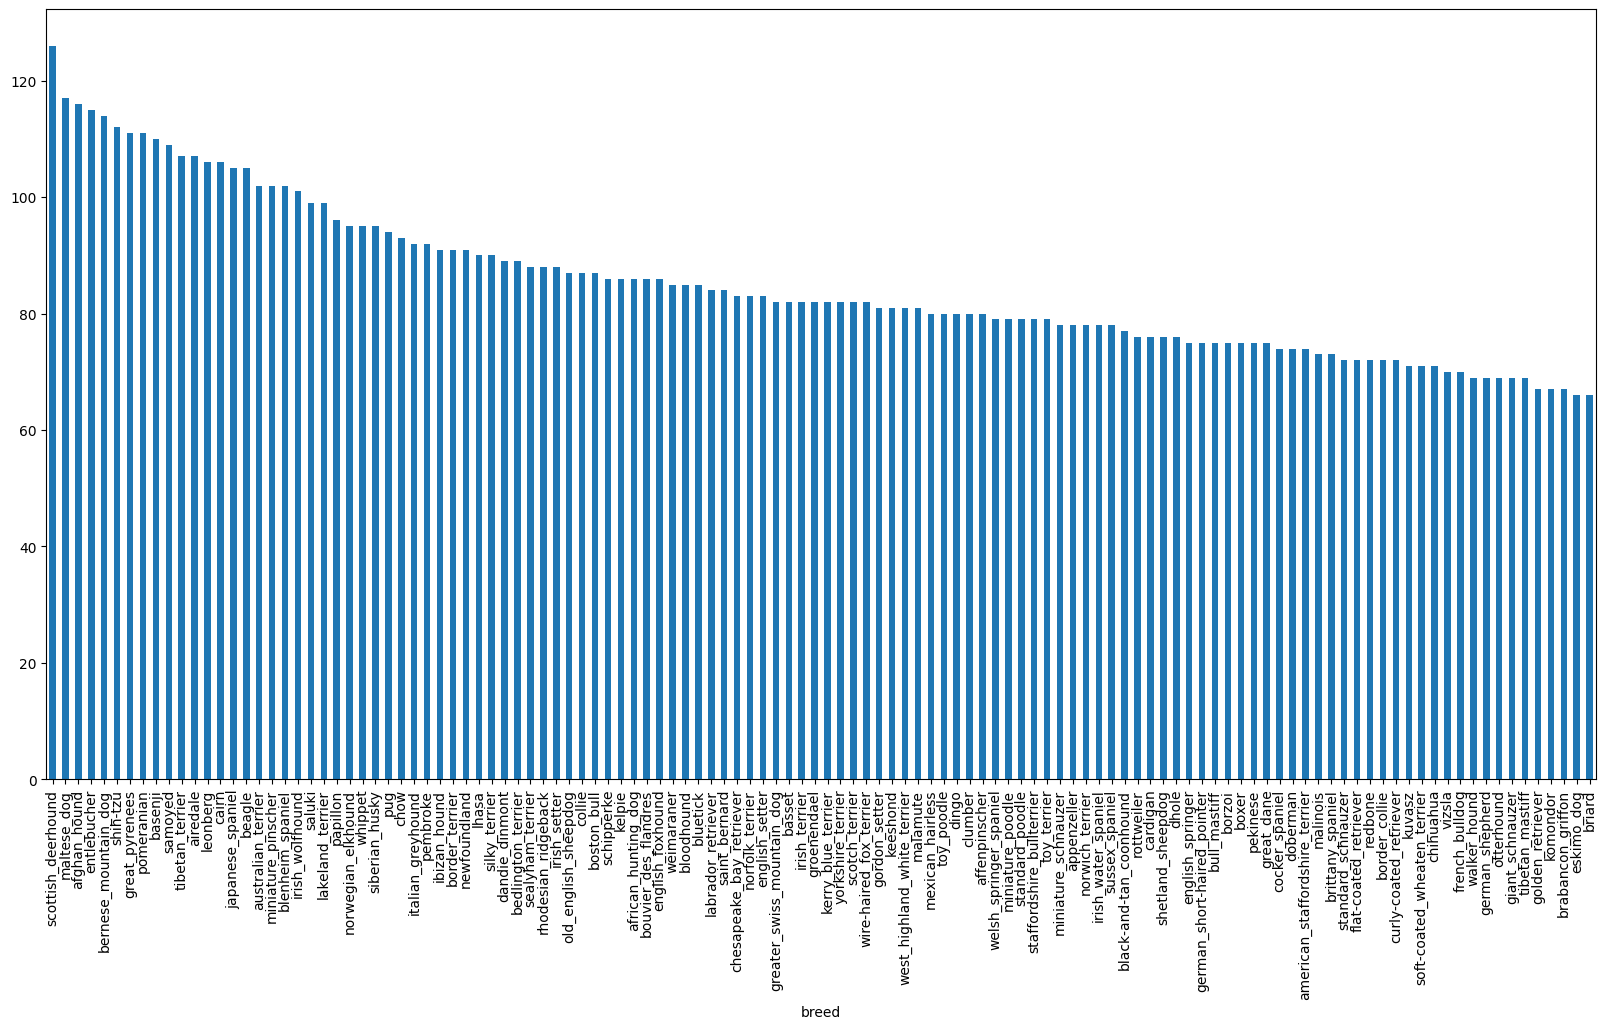

In [16]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

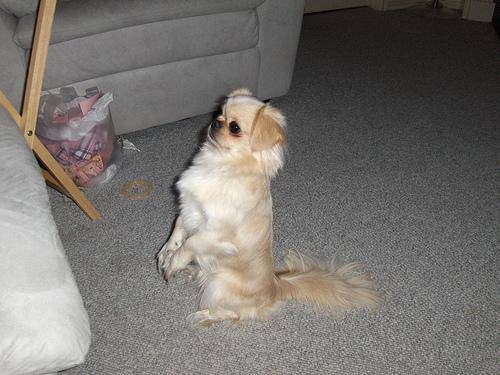

In [18]:
# To view the image

from IPython.display import Image
Image("drive/MyDrive/Dogs/train/001cdf01b096e06d78e9e5112d419397.jpg")

In [37]:
# Creating a list of pathnames for all the images so that we dont have to type out the image paths again and again

filenames = ["drive/MyDrive/Dogs/train/" + fnames + '.jpg' for fnames in labels_csv["id"]]

In [38]:
filenames


['drive/MyDrive/Dogs/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dogs/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dogs/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dogs/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dogs/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dogs/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dogs/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dogs/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dogs/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dogs/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/Dogs/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/Dogs/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/MyDrive/Dogs/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/MyDrive/Dogs/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 'drive/MyDrive/Dogs/train/0075dc49dab4024d12fafe67074d8a81.jpg',
 'drive/My

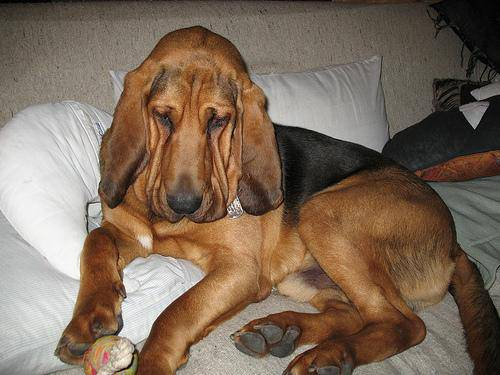

In [40]:
Image(filenames[69])

In [41]:
# Check whether the number of images is equal to the number in the file

import os
len(os.listdir ("drive/MyDrive/Dogs/train/"))

10222